<a href="https://colab.research.google.com/github/damilare-akin/dog-breed-classification/blob/main/Scrape_Breed_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
!pip install -Uqq fastbook # Install the fastai library and dependencies
import fastbook 
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.4MB/s 
     |████████████████████████████████| 194kB 15.5MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 1.2MB 22.9MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

## Downloading Images
First I have to rewrite the `search_images_ddg` function to change the line that runs the `.decode()` method on a string, since it just turns up errors.

In [ ]:
def search_images_ddg_new(term, max_images=200):
    "Search for `term` with DuckDuckGo and return a unique urls of about `max_images` images"
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        try:
            data = urljson(requestUrl,data=params)
            urls.update(L(data['results']).itemgot('image'))
            requestUrl = url + data['next']
        except (URLError,HTTPError): pass
        time.sleep(0.2)
    return L(urls)

In [ ]:
# breeds of dogs
breeds = ['Alsatian', 'Dalmatian', 'Boerboel', 'Siberian Husky']

# Create path to 'dogs' folder
data_path = Path('/content/gdrive/MyDrive/datasets')
dog_path = Path('/content/gdrive/MyDrive/datasets/dogs')

# Create folder
if not data_path.exists():
    data_path.mkdir()
if not dog_path.exists():
    dog_path.mkdir()

In [ ]:
urls = search_images_ddg_new('alsatian', max_images=3)
len(urls)

100

In [ ]:
urls

(#100) ['http://photos.demandstudios.com/getty/article/106/11/511060988_XS.jpg','https://www.dogbreedinfo.com/images29/AmericanAlsatianPurebredDogShepherdHector1YearOld5.jpg','http://3.bp.blogspot.com/-h9F2CjJcBT4/TWxxwv2qBOI/AAAAAAAADhk/E2xRoDA52q0/s1600/1.jpg','https://nationalpurebreddogday.com/wp-content/uploads/2018/09/reconstructed-dire-wolf-364x400.jpeg','https://www.mediastorehouse.com/p/172/animals/pets-dogs-pastoral-german-shepherd-dog/dog-german-shepherd-alsatian-646166_6947.jpg','http://www.dogartists.co.uk/wp-content/uploads/2012/01/alsatian-portrait.jpg','https://dogsaremyuniverse.com/wp-content/uploads/2017/03/Alsatian-Dog.jpg','https://animalcorner.org/wp-content/uploads/2020/04/American-Alsatian-Dog.jpg','http://www.dogartists.co.uk/wp-content/uploads/2011/12/Sina1-dog.jpg','https://c8.alamy.com/comp/CR3104/german-shepherd-dog-alsatian-showing-its-teeth-CR3104.jpg'...]

In [ ]:
for i in breeds:
    dest = (dog_path/i) # create a path object
    print(dest)
    dest.mkdir(exist_ok=True) # create a directory for the breeds

    # run the search function for each breed to get the URLs
    results = search_images_ddg_new(i)
    

    # Download the images using their URLs
    download_images(dest, urls=results)

/content/gdrive/MyDrive/datasets/dogs/Alsatian
/content/gdrive/MyDrive/datasets/dogs/Dalmatian
/content/gdrive/MyDrive/datasets/dogs/Boerboel
/content/gdrive/MyDrive/datasets/dogs/Siberian Husky


Great, the images are downloaded!

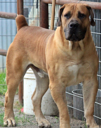

In [ ]:
img = Image.open('/content/gdrive/MyDrive/datasets/dogs/Boerboel/00000000.jpg')
img.to_thumb(128,128)

Let's verify the images

In [ ]:
all_images = get_image_files(dog_path)
failed_images = verify_images(all_images)
failed_images

(#8) [Path('/content/gdrive/MyDrive/datasets/dogs/Alsatian/00000068.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Alsatian/00000127.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Alsatian/00000230.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Dalmatian/00000282.png'),Path('/content/gdrive/MyDrive/datasets/dogs/Boerboel/00000016.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Boerboel/00000084.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Siberian Husky/00000003.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Siberian Husky/00000191.jpg')]

In [ ]:
failed_images.map(Path.unlink)

(#8) [None,None,None,None,None,None,None,None]

In [ ]:
failed_images = verify_images(all_images)
failed_images

(#8) [Path('/content/gdrive/MyDrive/datasets/dogs/Alsatian/00000068.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Alsatian/00000127.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Alsatian/00000230.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Dalmatian/00000282.png'),Path('/content/gdrive/MyDrive/datasets/dogs/Boerboel/00000016.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Boerboel/00000084.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Siberian Husky/00000003.jpg'),Path('/content/gdrive/MyDrive/datasets/dogs/Siberian Husky/00000191.jpg')]